In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import seaborn as sns
import json


In [2]:
df = pd.read_csv('US_Accidents_Dec19_2.csv',encoding='utf-8')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
columns_of_interest=['ID','Severity','Start_Time','End_Time','Start_Lat', 'Start_Lng', 'City', 'County', 'State',
       'Zipcode', 'Country','Visibility(mi)', 'Weather_Condition','Precipitation(in)','Sunrise_Sunset','Civil_Twilight']
condition=df['State'] =='TX'
txDF=df[condition][columns_of_interest]

txDF.head()

txDF['City'].value_counts()

Houston          93245
Austin           58553
Dallas           57823
San Antonio      21613
El Paso           9352
Fort Worth        8746
Arlington         3011
Irving            2697
Mesquite          2180
Grand Prairie     2159
Pflugerville      2152
Manor             1941
Del Valle         1451
Spring            1398
Humble            1274
Plano             1222
Richardson        1138
Carrollton        1089
Garland            989
Wichita Falls      819
Pasadena           718
Lewisville         691
Kingwood           688
Round Rock         671
Denton             603
Hurst              576
Lancaster          573
Duncanville        532
Grapevine          526
Bellaire           492
                 ...  
Celina               1
Sunset               1
Bedias               1
Menard               1
Willow Park          1
Bridge City          1
Gordonville          1
Nederland            1
Pipe Creek           1
Glenn Heights        1
Mc Caulley           1
Encino               1
Memphis    

In [5]:
txDF['Weather_Condition'].value_counts()

Clear                                  76753
Mostly Cloudy                          47948
Overcast                               45135
Partly Cloudy                          37059
Scattered Clouds                       25356
Fair                                   24646
Light Rain                             10485
Cloudy                                  9163
Rain                                    2457
Fog                                     2303
Haze                                    2189
Light Drizzle                           1321
Heavy Rain                               900
Light Thunderstorms and Rain             831
Thunderstorm                             586
Thunderstorms and Rain                   395
Heavy Thunderstorms and Rain             373
Light Rain with Thunder                  356
Thunder                                  256
Mostly Cloudy / Windy                    253
T-Storm                                  250
Fair / Windy                             241
Mist      

In [6]:
txDF.count()

ID                   298062
Severity             298062
Start_Time           298062
End_Time             298062
Start_Lat            298062
Start_Lng            298062
City                 298062
County               298062
State                298062
Zipcode              298062
Country              298062
Visibility(mi)       291444
Weather_Condition    291299
Precipitation(in)     77915
Sunrise_Sunset       298062
Civil_Twilight       298062
dtype: int64

In [7]:
#get total accidents across TX
tx_total_accidents=len(txDF['ID'].value_counts())
tx_total_accidents


298062

In [8]:
#group txDF by Weather_Condition
tx_grouped_weather = txDF.groupby('Weather_Condition')
#total counts of accidents occurring across various weather conditions
tx_total_by_group = tx_grouped_weather.nunique()['ID']
tx_total_by_group.head(15)
#total counts of accidents occurring across various weather conditions
#percent of accidents occurring across various weather conditions
#tx_percent_by_group = tx_total_by_group/tx_total_accidents
#tx_percent_by_group.head(15)
#create df of total and % accidents occurring across various weather conditions
tx_weather_conditionDF = pd.DataFrame({"Total Count": tx_total_by_group})
tx_weather_conditionDF

,Total Count
Weather_Condition,
Blowing Dust,3
Blowing Dust / Windy,28
Clear,76753
Cloudy,9163
Cloudy / Windy,219
Drizzle,199
Drizzle and Fog,6
Fair,24646
Fair / Windy,241


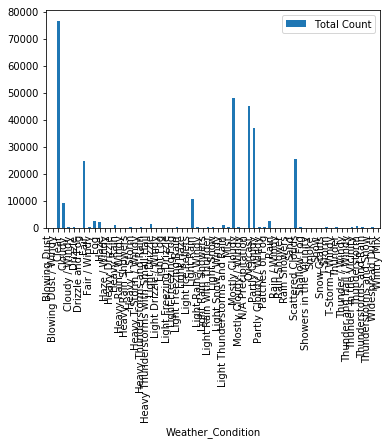

In [9]:
tx_weather_conditionDF.plot(kind="bar")

In [10]:
#create df for total counts of accidents during day and night 
tx_grouped_sun_set = txDF.groupby('Sunrise_Sunset')
#total counts of accidents occurring across various weather conditions
tx_total_sun_set = tx_grouped_sun_set.nunique()['ID']
tx_total_sun_set.head(15)
#total counts of accidents occurring across various weather conditions
#percent of accidents occurring across various weather conditions
#tx_percent_by_group = tx_total_by_group/tx_total_accidents
#tx_percent_by_group.head(15)
#create df of total and % accidents occurring across various weather conditions
tx_sun_setDF = pd.DataFrame({"Total Count": tx_total_sun_set})
tx_sun_setDF

,Total Count
Sunrise_Sunset,
Day,230645
Night,67417


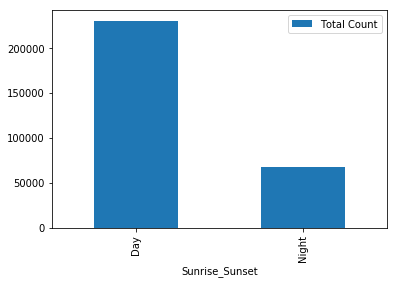

In [11]:
tx_sun_setDF.plot(kind="bar")

In [12]:
txDF['City'].value_counts()

Houston          93245
Austin           58553
Dallas           57823
San Antonio      21613
El Paso           9352
Fort Worth        8746
Arlington         3011
Irving            2697
Mesquite          2180
Grand Prairie     2159
Pflugerville      2152
Manor             1941
Del Valle         1451
Spring            1398
Humble            1274
Plano             1222
Richardson        1138
Carrollton        1089
Garland            989
Wichita Falls      819
Pasadena           718
Lewisville         691
Kingwood           688
Round Rock         671
Denton             603
Hurst              576
Lancaster          573
Duncanville        532
Grapevine          526
Bellaire           492
                 ...  
Celina               1
Sunset               1
Bedias               1
Menard               1
Willow Park          1
Bridge City          1
Gordonville          1
Nederland            1
Pipe Creek           1
Glenn Heights        1
Mc Caulley           1
Encino               1
Memphis    

In [13]:
#create df for total counts of accidents across cities 
tx_grouped_city = txDF.groupby('City')
#total counts of accidents occurring across various weather conditions
tx_total_city = tx_grouped_city.nunique()['ID']
tx_total_city.head(15)
#total counts of accidents occurring across various weather conditions
#percent of accidents occurring across cities in tx
tx_percent_city = tx_total_city/tx_total_accidents
tx_percent_city.head(15)
#create df of total and % accidents occurring across various weather conditions
tx_citiesDF = pd.DataFrame({"Total Count": tx_total_city,
                        "% of Accidents": tx_percent_city})
tx_citiesDF.head()

,Total Count,% of Accidents
City,,
Abbott,30,0.000101
Abernathy,3,0.000010
Abilene,41,0.000138
Addison,32,0.000107
Adkins,8,0.000027


In [14]:
tx_citiesDF.mean()

Total Count       418.039271
% of Accidents      0.001403
dtype: float64

In [15]:
tx_citiesDF.median()

Total Count       5.000000
% of Accidents    0.000017
dtype: float64

In [16]:
txDF.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,County,State,Zipcode,Country,Visibility(mi),Weather_Condition,Precipitation(in),Sunrise_Sunset,Civil_Twilight
261007,A-261009,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,Austin,Travis,TX,78731,US,10.0,Clear,NaN,Day,Day
261008,A-261010,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,Austin,Travis,TX,78752-2826,US,10.0,Clear,NaN,Day,Day
261009,A-261011,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,Austin,Travis,TX,78752,US,10.0,Clear,NaN,Day,Day
261010,A-261012,2,2016-11-30 16:06:49,2016-11-30 17:27:00,32.856014,-97.513084,Fort Worth,Tarrant,TX,76135,US,NaN,NaN,NaN,Day,Day
261011,A-261013,3,2016-11-30 16:35:01,2016-11-30 17:49:39,32.797668,-97.212090,Fort Worth,Tarrant,TX,76118,US,NaN,NaN,NaN,Day,Day


In [17]:
#create df for selected cities 
tx_metro_cities =  ['Austin', 'Round Rock', 'Cedar Park',
                 'San Marcos', 'Georgetown', 'Pflugerville',
                 'Hutto', 'Buda', 'Kyle', 'Leander',
                 'Dallas', 'Fort Worth', 'Arlington', 
                 'Plano','Garland', 'Irving', 'McKinney', 
                 'Frisco','Denton','Richardson', 'Allen','El Paso',
                 'Houston', 'The Woodlands', 'Sugar Land',
                 'Baytown', 'Conroe','San Antonio', 'New Braunfels', 
                 'Schertz', 'Seguin']

tx_metro_cities_df = pd.DataFrame({"City": tx_metro_cities})
tx_metro_cities_df

,City
0,Austin
1,Round Rock
2,Cedar Park
3,San Marcos
4,Georgetown
5,Pflugerville
6,Hutto
7,Buda
8,Kyle
9,Leander


In [18]:
tx_clean_city = pd.merge(tx_metro_cities_df, txDF, on='City')

In [19]:
tx_clean_city["City"].value_counts()

Houston          93245
Austin           58553
Dallas           57823
San Antonio      21613
El Paso           9352
Fort Worth        8746
Arlington         3011
Irving            2697
Pflugerville      2152
Plano             1222
Richardson        1138
Garland            989
Round Rock         671
Denton             603
Conroe             488
Cedar Park         448
Buda               353
Leander            280
New Braunfels      257
Sugar Land         256
Schertz            243
San Marcos         242
Baytown            236
Allen              196
Georgetown         183
Frisco             179
McKinney           163
Kyle               135
Hutto               80
Seguin              51
Name: City, dtype: int64

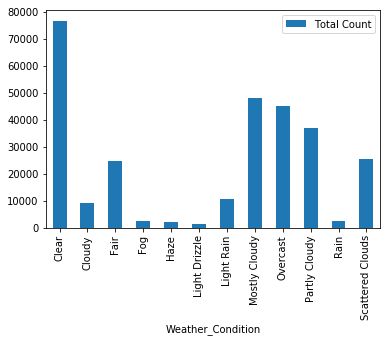

In [20]:
#gather only the weather conditions that have 1000+ accidents
tx_one_thousand=tx_weather_conditionDF.loc[(tx_weather_conditionDF["Total Count"]>1000)]
tx_one_thousand
tx_one_thousand.plot(kind="bar")

In [26]:
#create new dataframe form tx_clean_city that only includes: 
#weather condition catagories with 1000+ accidents
tx_cleaned_data = pd.merge(tx_clean_city, tx_one_thousand, on='Weather_Condition')
tx_cleaned_data.head()

,City,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,County,State,Zipcode,Country,Visibility(mi),Weather_Condition,Precipitation(in),Sunrise_Sunset,Civil_Twilight,Total Count
0,Austin,A-261009,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,Travis,TX,78731,US,10.0,Clear,NaN,Day,Day,76753
1,Austin,A-261010,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,Travis,TX,78752-2826,US,10.0,Clear,NaN,Day,Day,76753
2,Austin,A-261011,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,Travis,TX,78752,US,10.0,Clear,NaN,Day,Day,76753
3,Austin,A-261028,2,2016-11-30 17:11:22,2016-11-30 17:41:09,30.332523,-97.686707,Travis,TX,78752,US,10.0,Clear,NaN,Day,Day,76753
4,Austin,A-261039,2,2016-11-30 17:16:42,2016-11-30 17:46:32,30.292852,-97.747017,Travis,TX,78705,US,10.0,Clear,NaN,Day,Day,76753


Text(0, 0.5, 'Weather conditions')

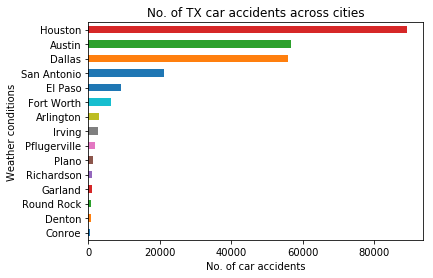

In [27]:
#create df for total counts of accidents across cities 
total_accident_data = tx_cleaned_data.groupby('City')['ID'].count().sort_values().tail(15)
total_accident_data
#total counts of accidents occurring across various weather conditions
#tx_total_accidents = total_accident_data.nunique()['ID']
#tx_total_accidents
total_accident_data.plot(kind="barh")
plt.title("No. of TX car accidents across cities")
plt.xlabel("No. of car accidents")
plt.ylabel("Weather conditions")

Text(0, 0.5, 'Weather conditions')

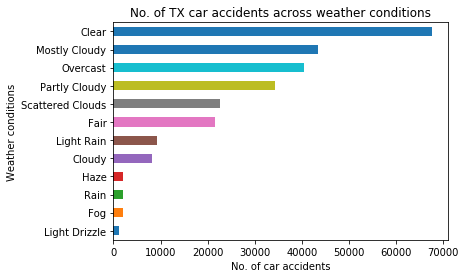

In [28]:
weather_condition_data = tx_cleaned_data.groupby('Weather_Condition')['ID'].count().sort_values().tail(15)
weather_condition_data.head()
weather_condition_data.plot(kind="barh")
plt.title("No. of TX car accidents across weather conditions")
plt.xlabel("No. of car accidents")
plt.ylabel("Weather conditions")

In [29]:
visibility_data = tx_cleaned_data.groupby('Visibility(mi)')['ID'].count().sort_values()
visibility_data


Visibility(mi)
46.00          1
0.90           1
10.50          1
1.40           1
3.50           1
0.63           2
1.10           2
111.00         3
1.60           3
2.20           4
5.50           5
0.06           5
15.00          7
1.90           7
0.12           9
2.80          11
0.40          19
0.00          57
0.75          59
0.25          70
20.00        109
11.00        129
12.00        138
0.10         150
1.20         380
0.80         456
1.80         509
1.50         620
0.50         670
1.00         993
0.20        1193
2.50        1293
2.00        1811
3.00        3097
4.00        3243
13.00       3536
6.00        4173
5.00        4218
8.00        6080
7.00        6553
9.00        9727
10.00     204383
Name: ID, dtype: int64

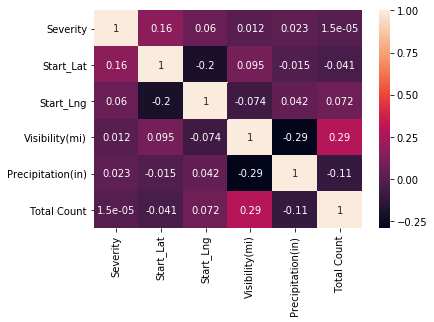

In [31]:
sns.heatmap(tx_cleaned_data.corr(), annot = True)

In [32]:
tx_clean_corr =tx_cleaned_data.corr()
tx_clean_corr.unstack().sort_values()
tx_clean_corr.unstack

<bound method DataFrame.unstack of                    Severity  Start_Lat  Start_Lng  Visibility(mi)  \
Severity           1.000000   0.163639   0.060076        0.011601   
Start_Lat          0.163639   1.000000  -0.202749        0.094569   
Start_Lng          0.060076  -0.202749   1.000000       -0.074463   
Visibility(mi)     0.011601   0.094569  -0.074463        1.000000   
Precipitation(in)  0.023242  -0.015068   0.041655       -0.290427   
Total Count        0.000015  -0.041050   0.071993        0.287762   

                   Precipitation(in)  Total Count  
Severity                    0.023242     0.000015  
Start_Lat                  -0.015068    -0.041050  
Start_Lng                   0.041655     0.071993  
Visibility(mi)             -0.290427     0.287762  
Precipitation(in)           1.000000    -0.106539  
Total Count                -0.106539     1.000000  >

In [286]:
tx_cleaned_data.head()

,City,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,County,State,Zipcode,Country,Visibility(mi),Weather_Condition,Precipitation(in),Sunrise_Sunset,Civil_Twilight,Total Count
0,Austin,A-261009,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,Travis,TX,78731,US,10.0,Clear,NaN,Day,Day,76753
1,Austin,A-261010,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,Travis,TX,78752-2826,US,10.0,Clear,NaN,Day,Day,76753
2,Austin,A-261011,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,Travis,TX,78752,US,10.0,Clear,NaN,Day,Day,76753
3,Austin,A-261028,2,2016-11-30 17:11:22,2016-11-30 17:41:09,30.332523,-97.686707,Travis,TX,78752,US,10.0,Clear,NaN,Day,Day,76753
4,Austin,A-261039,2,2016-11-30 17:16:42,2016-11-30 17:46:32,30.292852,-97.747017,Travis,TX,78705,US,10.0,Clear,NaN,Day,Day,76753


In [287]:
austin_city = tx_cleaned_data.loc[tx_cleaned_data["City"] == "Austin"]

In [288]:
austin_city.count()

City                 56898
ID                   56898
Severity             56898
Start_Time           56898
End_Time             56898
Start_Lat            56898
Start_Lng            56898
County               56898
State                56898
Zipcode              56898
Country              56898
Visibility(mi)       56288
Weather_Condition    56898
Precipitation(in)    16858
Sunrise_Sunset       56898
Civil_Twilight       56898
Total Count          56898
dtype: int64

In [289]:
#remove rows where lat and/or longs are nulls
austin_city.count()
austin_city.dtypes

City                  object
ID                    object
Severity               int64
Start_Time            object
End_Time              object
Start_Lat            float64
Start_Lng            float64
County                object
State                 object
Zipcode               object
Country               object
Visibility(mi)       float64
Weather_Condition     object
Precipitation(in)    float64
Sunrise_Sunset        object
Civil_Twilight        object
Total Count            int64
dtype: object

In [ ]:
# make sure to install these packages before running:
!pip install folium
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import geopandas as gpd
import requests
import gmaps
import json 
import os
import folium                    
import folium.plugins as plugins
from folium.plugins import HeatMapWithTime
from sodapy import Socrata
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

In [290]:
#ID needs to be converted to float
austin_clean=austin_city.loc[:,["Start_Lat", "Start_Lng"]]
austin_clean.head()


,Start_Lat,Start_Lng
0,30.336502,-97.755646
1,30.328165,-97.694305
2,30.326077,-97.692307
3,30.332523,-97.686707
4,30.292852,-97.747017


In [291]:
#decided to just create a new column labeled ID
austin_clean["ID"]=austin_clean.index + 1
austin_clean.head()

,Start_Lat,Start_Lng,ID
0,30.336502,-97.755646,1
1,30.328165,-97.694305,2
2,30.326077,-97.692307,3
3,30.332523,-97.686707,4
4,30.292852,-97.747017,5


In [292]:
#creating a variable that only has what we need: id, long, lat
austin_cluster=austin_clean.loc[:,["ID","Start_Lat", "Start_Lng"]]
austin_cluster.head(10)

,ID,Start_Lat,Start_Lng
0,1,30.336502,-97.755646
1,2,30.328165,-97.694305
2,3,30.326077,-97.692307
3,4,30.332523,-97.686707
4,5,30.292852,-97.747017
5,6,30.198725,-97.862808
6,7,30.215410,-97.797661
7,8,30.418287,-97.700874
8,9,30.283806,-97.824226
9,10,30.263641,-97.741791


<function matplotlib.pyplot.show(*args, **kw)>

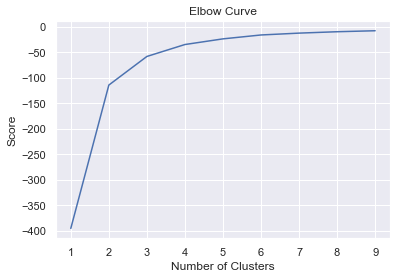

In [293]:
#elbow method to validate the number of clusters 
K_clusters = range(1,10)
kmeans=[KMeans(n_clusters=i)for i in K_clusters]
Y_axis=austin_city[["Start_Lat"]]
X_axis=austin_city[["Start_Lng"]]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
#visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.show

In [296]:
#from above Elbow curve, we see that we only need 4 clusters
#determined where the graph begins to level off slowly 
kmeans=KMeans(n_clusters = 3, init = "k-means++")
#compute k-means clustering
kmeans.fit(austin_cluster[austin_cluster.columns[1:3]])
austin_cluster["Cluster_Label"]=kmeans.fit_predict(austin_cluster[austin_cluster.columns[1:3]])
#coordinates of cluster centers
centers = kmeans.cluster_centers_
#labels for each point
labels=kmeans.predict(austin_cluster[austin_cluster.columns[1:3]])
austin_cluster.head(20)


,ID,Start_Lat,Start_Lng,Cluster_Label
0,1,30.336502,-97.755646,2
1,2,30.328165,-97.694305,0
2,3,30.326077,-97.692307,0
3,4,30.332523,-97.686707,0
4,5,30.292852,-97.747017,0
5,6,30.198725,-97.862808,1
6,7,30.215410,-97.797661,1
7,8,30.418287,-97.700874,2
8,9,30.283806,-97.824226,1
9,10,30.263641,-97.741791,0


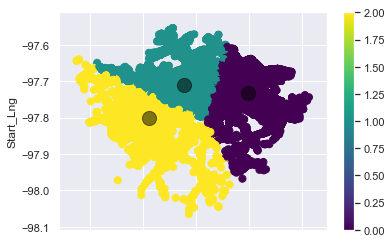

In [295]:
#using lat and longs to see where accidents occured in Ausitn 
austin_cluster.plot.scatter(x="Start_Lat", y="Start_Lng", c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [307]:
austin_cluster.head(25)

,ID,Start_Lat,Start_Lng,Cluster_Label
0,1,30.336502,-97.755646,2
1,2,30.328165,-97.694305,0
2,3,30.326077,-97.692307,0
3,4,30.332523,-97.686707,0
4,5,30.292852,-97.747017,0
5,6,30.198725,-97.862808,1
6,7,30.215410,-97.797661,1
7,8,30.418287,-97.700874,2
8,9,30.283806,-97.824226,1
9,10,30.263641,-97.741791,0


In [ ]:
grouped_cluster = austin_cluster.groupby(["Cluster_Label"])["Start_Lng"].count()
grouped_cluster

In [ ]:
grouped_cluster.plot(kind="bar")
plt.title("Car accidents across locations")
plt.xlabel("Clusters")
plt.ylabel("Number of accidents")

In [ ]:
#create a boxplot to compare means
austin_cluster.boxplot("Start_Lng", by="Cluster_Label", figsize=(20,20))

In [ ]:
#cluster ANOVA
cluster1= austin_cluster[austin_cluster["Cluster_Label"]==0]["Start_Lng"]
cluster2= austin_cluster[austin_cluster["Cluster_Label"]==1]["Start_Lng"]
cluster3= austin_cluster[austin_cluster["Cluster_Label"]==2]["Start_Lng"]
cluster4= austin_cluster[austin_cluster["Cluster_Label"]==2]["Start_Lng"]
clusters=(cluster1,cluster2,cluster3,cluster4)
stats.f_oneway(*clusters)

In [ ]:
#gmaps.configure(api_key="")

In [322]:
#locations=austin_cluster[["Start_Lat", "Start_Lng"]]
#clusters=austin_cluster["Cluster_Label"]
#figure = gmaps.figure()
#heat_layer=gmaps.heatmap_layer(locations, weight, 
                            #dissipating=True,
                            #max_intensity =5,
                            #point_radius =0.5)
#figure.add_layer(heat_layer)

In [323]:
#figure

Figure(layout=FigureLayout(height='420px'))

In [ ]:


# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.austintexas.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.austintexas.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
#results = client.get("9jd4-zjmx", limit=2000)

# Convert to pandas DataFrame
#results_df = pd.DataFrame.from_records(results)

In [ ]:
#results_df.head()

In [ ]:
#help(gmaps.configure)
#gmaps.configure(api_key=None)